In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
homicidios = pd.read_csv("homicidios.csv")

In [14]:
homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1.0,1/1/2016,2016.0,1.0,1.0,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8.0,Point (98896.78238426 93532.43437792),-58,-35,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1.0,1/2/2016,2016.0,1.0,2.0,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9.0,Point (95832.05571093 95505.41641999),-59,-35,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1.0,1/3/2016,2016.0,1.0,3.0,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1.0,Point (106684.29090040 99706.57687843),-58,-35,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1.0,1/10/2016,2016.0,1.0,10.0,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8.0,Point (99840.65224780 94269.16534422),-58,-35,MOTO-SD,MOTO,SD
4,2016-0005,1.0,1/21/2016,2016.0,1.0,21.0,5:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1.0,Point (106980.32827929 100752.16915795),-58,-35,MOTO-PASAJEROS,MOTO,PASAJEROS


In [15]:
homicidios.isna().mean()

ID                       0.933670
N_VICTIMAS               0.933670
FECHA                    0.933670
AAAA                     0.933670
MM                       0.933670
DD                       0.933670
HORA                     0.933670
HH                       0.933670
LUGAR_DEL_HECHO          0.933670
TIPO_DE_CALLE            0.933670
Calle                    0.933765
Altura                   0.987706
Cruce                    0.949967
Dirección Normalizada    0.934432
COMUNA                   0.933670
XY (CABA)                0.933670
pos x                    0.933670
pos y                    0.933670
PARTICIPANTES            0.933670
VICTIMA                  0.933670
ACUSADO                  0.933670
dtype: float64

Vemos que el dataset de homicidios tiene muchos datos nulos y muchas de esas columnas tienen todas las columnas vacias, asi que hay que eliminarlas

In [16]:
#Eliminamos las filas que tengan 5 columnas o mas con datos nulos
homicidios.dropna(thresh=5, inplace=True)

In [17]:
homicidios.isna().mean()

ID                       0.000000
N_VICTIMAS               0.000000
FECHA                    0.000000
AAAA                     0.000000
MM                       0.000000
DD                       0.000000
HORA                     0.000000
HH                       0.000000
LUGAR_DEL_HECHO          0.000000
TIPO_DE_CALLE            0.000000
Calle                    0.001437
Altura                   0.814655
Cruce                    0.245690
Dirección Normalizada    0.011494
COMUNA                   0.000000
XY (CABA)                0.000000
pos x                    0.000000
pos y                    0.000000
PARTICIPANTES            0.000000
VICTIMA                  0.000000
ACUSADO                  0.000000
dtype: float64

In [19]:
homicidios.describe(include="all")

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
count,696,696.000000,696,696.000000,696.000000,696.000000,696,696,696,696,...,129.000000,525,688,696.000000,696,696,696,696,696,696
unique,696,NaN,598,NaN,NaN,NaN,346,25,683,4,...,NaN,317,635,NaN,606,5,4,41,10,10
top,2016-0001,NaN,12/18/2018,NaN,NaN,NaN,21:00:00,7,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,NaN,"PAZ, GRAL. AV.",27 DE FEBRERO AV. y ESCALADA AV.,NaN,Point (. .),-58,-35,PEATON-PASAJEROS,MOTO,AUTO
freq,1,NaN,3,NaN,NaN,NaN,10,41,4,429,...,NaN,14,5,NaN,14,602,682,105,295,204
mean,NaN,1.030172,NaN,2018.188218,6.692529,15.936782,NaN,NaN,NaN,NaN,...,3336.635659,NaN,NaN,7.425287,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.179393,NaN,1.683754,3.571309,8.639646,NaN,NaN,NaN,NaN,...,3060.641793,NaN,NaN,4.387050,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,...,30.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,2017.000000,4.000000,9.000000,NaN,NaN,NaN,NaN,...,1359.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,2018.000000,7.000000,16.000000,NaN,NaN,NaN,NaN,...,2551.000000,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,2020.000000,10.000000,23.000000,NaN,NaN,NaN,NaN,...,4500.000000,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#Agrupamos por año y sumamos el numero total de victimas
total_por_año = homicidios.groupby("AAAA")["N_VICTIMAS"].sum().reset_index()

In [27]:
total_por_año

,AAAA,N_VICTIMAS
0,2016.0,146.0
1,2017.0,140.0
2,2018.0,149.0
3,2019.0,104.0
4,2020.0,81.0
5,2021.0,97.0


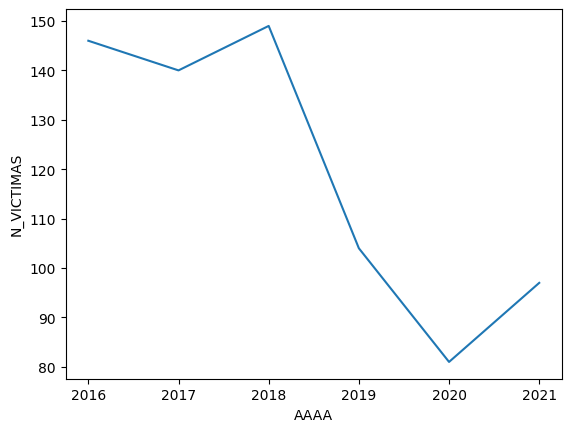

In [33]:
#Graficamos el total de victimas por año
sns.lineplot(data=total_por_año, x="AAAA", y="N_VICTIMAS")
plt.show()

Podemos ver que del 2016 al 2019 morían mas de 100 personas al año por accidentes de tránsito, pero este numero en 2020 y 2021 se redujo mucho debido a la pandemia ya que las personas circulaban menos por la calle

In [65]:
#Agrupamos por la fecha y sumamos el numero de victimas
total_por_dia = homicidios.groupby("FECHA")["N_VICTIMAS"].sum().reset_index()
#Chequeamos el valor maximo de muertes en un dia
total_por_dia["N_VICTIMAS"].max()

3.0

In [37]:
#Filtramos en que dias murieron 3 personas
total_por_dia[total_por_dia["N_VICTIMAS"] == 3.0]

,FECHA,N_VICTIMAS
15,1/16/2017,3.0
119,11/19/2017,3.0
136,11/26/2016,3.0
163,12/11/2017,3.0
168,12/12/2018,3.0
180,12/18/2018,3.0
191,12/22/2018,3.0
196,12/25/2020,3.0
213,12/5/2020,3.0
226,2/17/2016,3.0


In [40]:
#Nos fijamos en cuantos dias murieron 3 personas
len(total_por_dia[total_por_dia["N_VICTIMAS"] == 3.0])

17

In [41]:
#El promedio de muertes que hay cuando se produce un accidente de transito
homicidios["N_VICTIMAS"].mean()

1.0301724137931034

In [43]:
#Agrupamos por comuna y sumamos el numero de victimas
victimas_por_comuna = homicidios.groupby("COMUNA")["N_VICTIMAS"].sum().reset_index()
victimas_por_comuna

,COMUNA,N_VICTIMAS
0,0.0,2.0
1,1.0,93.0
2,2.0,25.0
3,3.0,46.0
4,4.0,79.0
5,5.0,22.0
6,6.0,22.0
7,7.0,62.0
8,8.0,67.0
9,9.0,75.0


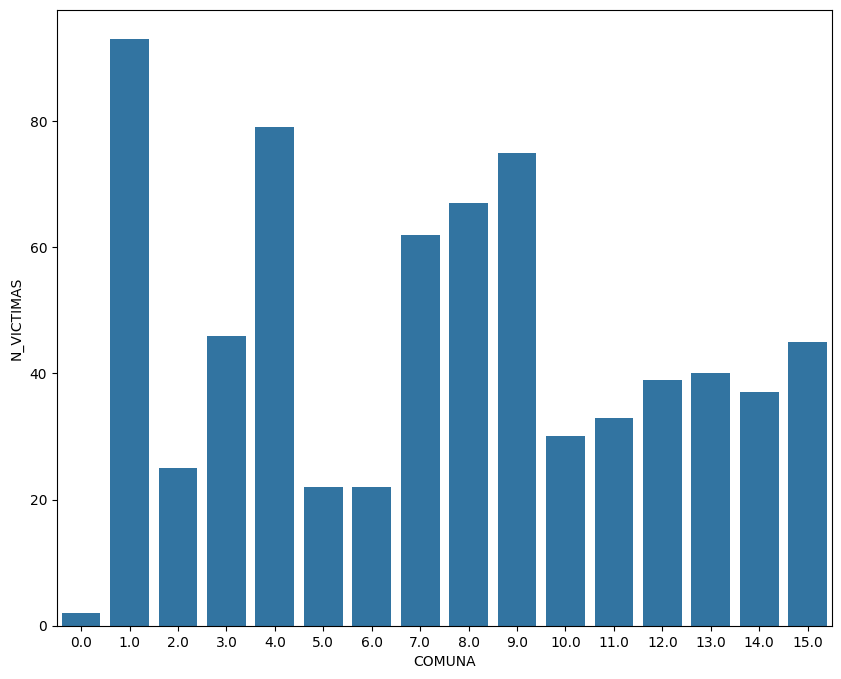

In [45]:
#Graficamos el dataframe
figura = plt.figure(figsize=(10, 8))
sns.barplot(data = victimas_por_comuna, x="COMUNA", y="N_VICTIMAS")
plt.show()

Podemos ver en el grafico que la comuna con mas victimas es la comuna 1

In [47]:
#Agrupamos por mes y sumamos el numero de victimas
victimas_por_mes = homicidios.groupby("MM")["N_VICTIMAS"].sum().reset_index()
victimas_por_mes

,MM,N_VICTIMAS
0,1.0,62.0
1,2.0,59.0
2,3.0,56.0
3,4.0,52.0
4,5.0,60.0
5,6.0,58.0
6,7.0,51.0
7,8.0,67.0
8,9.0,51.0
9,10.0,52.0


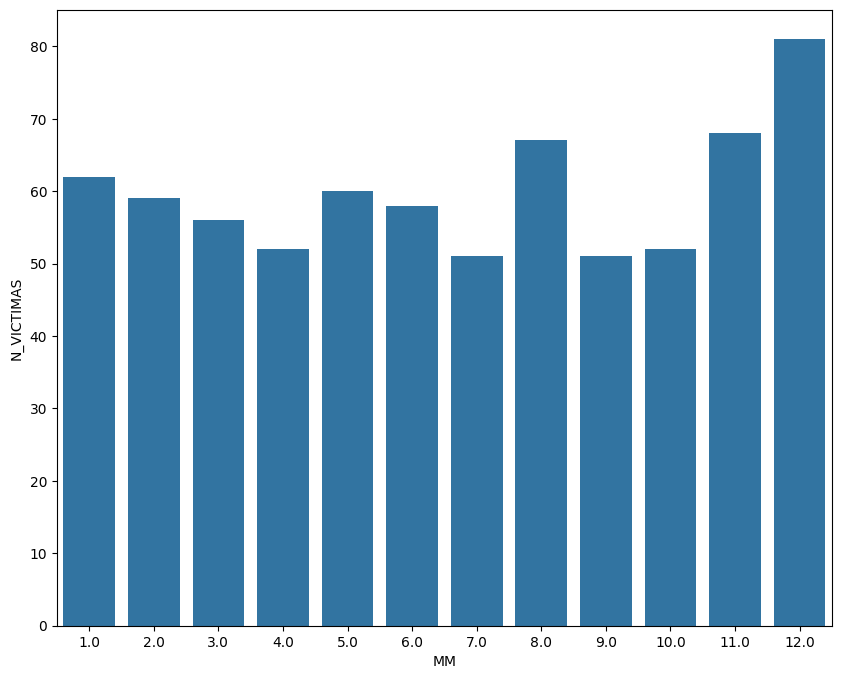

In [48]:
#Graficamos el dataframe
figura_v_mes = plt.figure(figsize=(10, 8))
sns.barplot(data = victimas_por_mes, x="MM", y="N_VICTIMAS")
plt.show()

Podemos ver en el grafico que el mayor numero de victimas es en diciembre

In [49]:
victimas_por_tipocalle = homicidios.groupby("TIPO_DE_CALLE")["N_VICTIMAS"].sum().reset_index()
victimas_por_tipocalle

,TIPO_DE_CALLE,N_VICTIMAS
0,AUTOPISTA,68.0
1,AVENIDA,442.0
2,CALLE,138.0
3,GRAL PAZ,69.0


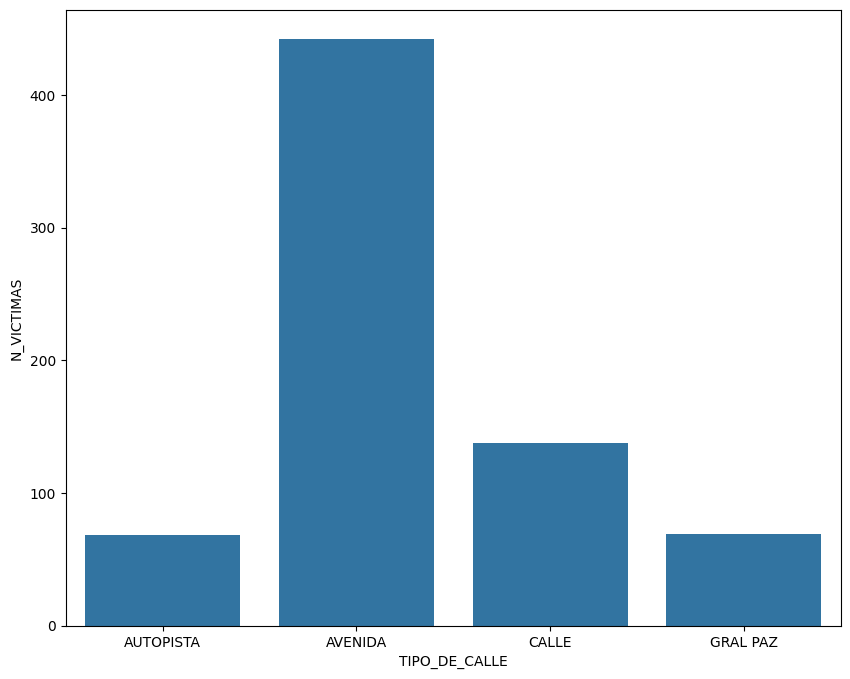

In [51]:
figura_v_mes = plt.figure(figsize=(10, 8))
sns.barplot(data = victimas_por_tipocalle, x="TIPO_DE_CALLE", y="N_VICTIMAS")
plt.show()

El mayor numero de victimas lo tienen las avenidas, esto puede ser porque circulan mas vehiculos y peatones que en otros lugares

In [57]:
#Agrupamos por participantes y sumamos el numero de victimas
total_por_participantes = homicidios.groupby("PARTICIPANTES")["N_VICTIMAS"].sum().reset_index()
total_por_participantes

,PARTICIPANTES,N_VICTIMAS
0,AUTO-AUTO,33.0
1,AUTO-CARGAS,15.0
2,AUTO-MOVIL,1.0
3,AUTO-OBJETO FIJO,28.0
4,AUTO-PASAJEROS,10.0
5,AUTO-SD,4.0
6,BICICLETA-AUTO,8.0
7,BICICLETA-CARGAS,10.0
8,BICICLETA-OTRO,1.0
9,BICICLETA-PASAJEROS,8.0


In [63]:
#Vemos el valor maximo de victimas del dataframe
total_por_participantes["N_VICTIMAS"].max()

105.0

In [64]:
#Vemos que participantes tienen el numero maximo de victimas
total_por_participantes[total_por_participantes["N_VICTIMAS"] == 105.0]

,PARTICIPANTES,N_VICTIMAS
34,PEATON-PASAJEROS,105.0


El mayor numero de victimas lo tiene el tipo de homicidio de peaton-pasajeros